# Testing Hamiltonian Simulation using Trotterization

This code test the H_Evolution.py to simulate a specific hamilatonian. Which can be in short describe as:

$$ |\psi(t)\rangle = e^{-i H t} |\psi(0)\rangle $$

$$ |\psi(t)\rangle \approx \left( \prod_r e^{-i \alpha_r H_r t/n}  \right)^n |\psi(0)\rangle $$

You can define any kind of hamiltonian using a dictionary of operators, or given a matrix to used the matrix descomposition (a code that I already posted here!).

You can find more information on:

- https://qiskit.org/ecosystem/algorithms/tutorials/13_trotterQRTE.html

### Initial Steps

Let's used the matrix definition of a matrix to implement the time evolution. Remember, any Hamiltonian in principle is a matrix.

In [99]:
### Import the required libreries
from py_functions.Pauli_decom import pauli_composition as pd
from py_functions.H_Evolution import H_Evolution as He
import numpy as np
import scipy as sc
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
import matplotlib.pyplot as plt
from qiskit.opflow import Z, I, X
from qiskit.quantum_info import SparsePauliOp, PauliList
from qiskit.opflow.state_fns import CircuitStateFn
import array_to_latex as a2l

In [ ]:
### Matrix definition, given a list of pauli operators with a 
# list of coefficients you can have the matrix representation.
def give_matrix(pauli):

    opt = [valor for valor in pauli.keys()]
    opt = PauliList(opt)

    coeffs = [valor for valor in pauli.values()]
    coeffs = np.array(coeffs)

    ham = SparsePauliOp(opt, coeffs)
    matrix = ham.to_matrix()

    return matrix

Let's define the following list of operators. If you are curious you can check the refereces to know where we get that list.

In [9]:
opt = ['IZZ', 'ZZI', 'IIZ', 'IZI', 'ZII', 'IIX', 'IXI', 'XII']
coeff = [-0.2       +0.j, -0.2       +0.j, -0.45922012+0.j, -0.45922012+0.j,
 -0.45922012+0.j, -1.10865544+0.j, -1.10865544+0.j, -1.10865544+0.j]

pauli = dict(zip(opt, coeff))
prob = np.abs(np.array(list(pauli.values())))
print(pauli)

{'IZZ': (-0.2+0j), 'ZZI': (-0.2+0j), 'IIZ': (-0.45922012+0j), 'IZI': (-0.45922012+0j), 'ZII': (-0.45922012+0j), 'IIX': (-1.10865544+0j), 'IXI': (-1.10865544+0j), 'XII': (-1.10865544+0j)}


In [109]:
matrix_ham = give_matrix(pauli)
a2l.to_ltx(matrix_ham)

\begin{bmatrix}
 -1.78 + 0.00j & -1.11 + 0.00j & -1.11 + 0.00j &  -0.00 + 0.00j & -1.11 + 0.00j &  -0.00 + 0.00j &  -0.00 + 0.00j &  -0.00 + 0.00j\\
 -1.11 + 0.00j & -0.46 + 0.00j &  -0.00 + 0.00j & -1.11 + 0.00j &  -0.00 + 0.00j & -1.11 + 0.00j &  -0.00 + 0.00j &  -0.00 + 0.00j\\
 -1.11 + 0.00j &  -0.00 + 0.00j & -0.06 + 0.00j & -1.11 + 0.00j &  -0.00 + 0.00j &  -0.00 + 0.00j & -1.11 + 0.00j &  -0.00 + 0.00j\\
  -0.00 + 0.00j & -1.11 + 0.00j & -1.11 + 0.00j &  0.46 + 0.00j &  -0.00 + 0.00j &  -0.00 + 0.00j &  -0.00 + 0.00j & -1.11 + 0.00j\\
 -1.11 + 0.00j &  -0.00 + 0.00j &  -0.00 + 0.00j &  -0.00 + 0.00j & -0.46 + 0.00j & -1.11 + 0.00j & -1.11 + 0.00j &  -0.00 + 0.00j\\
  -0.00 + 0.00j & -1.11 + 0.00j &  -0.00 + 0.00j &  -0.00 + 0.00j & -1.11 + 0.00j &  0.86 + 0.00j &  -0.00 + 0.00j & -1.11 + 0.00j\\
  -0.00 + 0.00j &  -0.00 + 0.00j & -1.11 + 0.00j &  -0.00 + 0.00j & -1.11 + 0.00j &  -0.00 + 0.00j &  0.46 + 0.00j & -1.11 + 0.00j\\
  -0.00 + 0.00j &  -0.00 + 0.00j &  -0.00 + 0.00j & -

$$\begin{bmatrix}
 -1.78 + 0.00j & -1.11 + 0.00j & -1.11 + 0.00j &  -0.00 + 0.00j & -1.11 + 0.00j &  -0.00 + 0.00j &  -0.00 + 0.00j &  -0.00 + 0.00j\\
 -1.11 + 0.00j & -0.46 + 0.00j &  -0.00 + 0.00j & -1.11 + 0.00j &  -0.00 + 0.00j & -1.11 + 0.00j &  -0.00 + 0.00j &  -0.00 + 0.00j\\
 -1.11 + 0.00j &  -0.00 + 0.00j & -0.06 + 0.00j & -1.11 + 0.00j &  -0.00 + 0.00j &  -0.00 + 0.00j & -1.11 + 0.00j &  -0.00 + 0.00j\\
  -0.00 + 0.00j & -1.11 + 0.00j & -1.11 + 0.00j &  0.46 + 0.00j &  -0.00 + 0.00j &  -0.00 + 0.00j &  -0.00 + 0.00j & -1.11 + 0.00j\\
 -1.11 + 0.00j &  -0.00 + 0.00j &  -0.00 + 0.00j &  -0.00 + 0.00j & -0.46 + 0.00j & -1.11 + 0.00j & -1.11 + 0.00j &  -0.00 + 0.00j\\
  -0.00 + 0.00j & -1.11 + 0.00j &  -0.00 + 0.00j &  -0.00 + 0.00j & -1.11 + 0.00j &  0.86 + 0.00j &  -0.00 + 0.00j & -1.11 + 0.00j\\
  -0.00 + 0.00j &  -0.00 + 0.00j & -1.11 + 0.00j &  -0.00 + 0.00j & -1.11 + 0.00j &  -0.00 + 0.00j &  0.46 + 0.00j & -1.11 + 0.00j\\
  -0.00 + 0.00j &  -0.00 + 0.00j &  -0.00 + 0.00j & -1.11 + 0.00j &  -0.00 + 0.00j & -1.11 + 0.00j & -1.11 + 0.00j &  0.98 + 0.00j
\end{bmatrix} $$

Ready to evolve this matrix using the list operators as before:

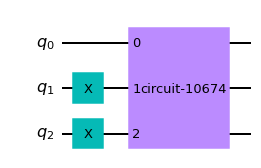

In [17]:
### Testing with some basic circuit and hamiltonian.
list_opt = list(pauli.keys())
dim_opt = len(list_opt[0])

### Time for evolution (remember that this is just for one value)
t = 1
### Number of repetitions
n = 1

### Exponential circuit
prep = He.Exp_evolution(pauli, prob, t, n)
qc_prep = QuantumCircuit(dim_opt)
qc_prep.append(prep, list(np.arange(0,dim_opt)))

### Repetition
qc_complete = QuantumCircuit(dim_opt)
### Initial state
qc_complete.x(1)
qc_complete.x(2)
### Add the quantum circuit
qc_complete.append(qc_prep, list(np.arange(0,dim_opt)))

qc_complete.draw('mpl')

You can decompose the quantum circuit to see whats inside. Using qc_complete.decompose().draw('mpl')

Now, let's evaluate the circuit calculatatig the expectation value of an operator. We can use Qiskit for this or just build the operator by yourself.

In [23]:
# Qiskit implementation for operator
op = (1 * Z^I^I) + (1 * I^Z^I) + (1 * I^I^Z)

Or just build it yourself with our previous implementation.

In [116]:
info_dict = {'ZII': 1, 'IZI': 1, 'IIZ':1}
matrix_op = give_matrix(info_dict)
a2l.to_ltx(matrix_op, frmt = '{:3.0f}')

\begin{bmatrix}
    3 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j \\
    0 +   0j  &    1 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j \\
    0 +   0j  &    0 +   0j  &    1 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j \\
    0 +   0j  &    0 +   0j  &    0 +   0j  &  -1 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j \\
    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &    1 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j \\
    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &  -1 +   0j  &    0 +   0j  &    0 +   0j \\
    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &  -1 +   0j  &    0 +   0j \\
    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &  -3 +   0j 
\end{bmatrix}


$$ \begin{bmatrix}
    3 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j \\
    0 +   0j  &    1 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j \\
    0 +   0j  &    0 +   0j  &    1 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j \\
    0 +   0j  &    0 +   0j  &    0 +   0j  &  -1 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j \\
    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &    1 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j \\
    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &  -1 +   0j  &    0 +   0j  &    0 +   0j \\
    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &  -1 +   0j  &    0 +   0j \\
    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &    0 +   0j  &  -3 +   0j 
\end{bmatrix} $$

Finally, let's simulate:

In [88]:
# The final time
t = 10
# The number of samples
samples = 30
times = np.linspace(0, t, samples)
# List to storage the expectation values.
exp_values = []
# The number of repetitions in the trotter.
n = 2

### Implementation
for time in times:

    ### Exponential circuit
    prep = He.Exp_evolution(pauli, prob, time, n)
    qc_prep = QuantumCircuit(dim_opt, name="e^-iH{}/{}".format(time, n))
    qc_prep.append(prep, list(np.arange(0,dim_opt)))

    ### Repetition
    qc_complete = QuantumCircuit(dim_opt)

    # Initial state (Given in the example of the references)
    qc_complete.x([0])
    qc_complete.x([1])

    qc_complete.append(qc_prep, list(np.arange(0,dim_opt)))

    # Vector state of the circuit
    psi = CircuitStateFn(qc_complete)

    # Calculating the expectation value with the operator and the state.
    exp_value = psi.adjoint().compose(op).compose(psi).eval().real
    exp_values.append(exp_value)

As we have the all the matrix representations we can analitally compute the results and compare. But, we need also and initial state. Let's build a function that make this for us:

In [24]:
def initial_state(vector):
    if vector[0] == 0:
        opt = np.array([1,0])
    else:
        opt = np.array([0,1])

    for i in range(1, len(vector)):
        if vector[i] == 0:
            opt = np.kron(opt, np.array([1,0]))
        else:
            opt = np.kron(opt, np.array([0,1]))
    return opt

In [30]:
print(initial_state([0,0,0,0]))
print(initial_state([1,1,1,1]))

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [58]:
exp_values_exact = []
t = 10
samples = 150
times_exact = np.linspace(0, t, samples)

### Implementation
for time in times_exact:

    ### Exponential circuit
    exp = sc.linalg.expm(-1j * time * matrix_ham)
    ### Initial state
    init = initial_state([0,1,1])
    ### Final state
    final_state = np.matmul(exp, init)
    final_state_dg = np.matrix(final_state).getH()

    expectation_value = np.matmul(final_state, np.matmul(matrix_op, final_state_dg))
    exp_values_exact.append(np.real(expectation_value.item(0)))

In [85]:
# Here I am gona upload different expectation value for a given n.
n_4 = np.load("data/trotter_n_4.npy")
n_8 = np.load("data/trotter_n_8.npy")
n_16 = np.load("data/trotter_n_16.npy")
n_32 = np.load("data/trotter_n_32.npy")

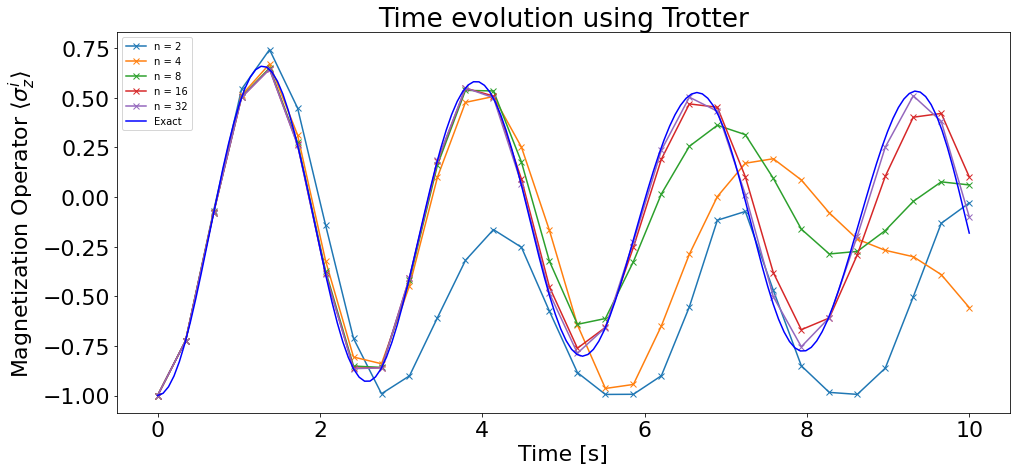

In [89]:
plt.rcParams["figure.figsize"] = [16, 7]
plt.rcParams['legend.fontsize'] = 10
plt.rcParams.update({'font.size': 22})

plt.plot(times, exp_values, '-x', label="n = 2")
plt.plot(times, n_4, '-x', label="n = 4")
plt.plot(times, n_8, '-x', label="n = 8")
plt.plot(times, n_16, '-x', label="n = 16")
plt.plot(times, n_32, '-x', label="n = 32")
plt.plot(times_exact, exp_values_exact, '-b', label="Exact")
plt.title("Time evolution using Trotter")
plt.xlabel(f"Time [s]")
plt.ylabel(f"Magnetization Operator $\\langle \\sigma_z^i \\rangle$")
plt.legend()
plt.show()

You can clearly see that when we increase the number of n we will have better accuracy to the evolution operator!

In [98]:
from py_functions import tutorial_magics

%qiskit_version_table